<a href="https://colab.research.google.com/github/DesiPilla/DSPS_dPilla/blob/master/HW6/SNdataLineFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Objective: fit supernova cosmology data : the linear relationship between logarithm redshift and luminosity of supernovae is evidence of the expansion of the Universe. In this homework you will fit the supernova data with a line, in the next class we will discover evidence of the *accelerated* expansion of the Universe

# Get the data

Download the supernova (SN) data used in the Betoule 2014 paper https://arxiv.org/abs/1401.4064. The data can be obtained here 
http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html

As it says on the webpage: "The JLA C++ code and data are available from a single archive: jla_likelihood_v6.tgz". 
Download it and unpack it (untar unzip) within the notebook (mounting your drive on colab etc) and move the data to the folder /drive/My Drive/dsps/data

The input data file is named jla_lcparams.txt


In [66]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
ls

'2018 TEAM DELAWARE WORLD FINALS INFORMATION SHEET.gdoc'
'9-6-17 General Agenda.gdoc'
'A3 .gdoc'
 A7.gdoc
 A8.gdoc
'Activity 5.gdoc'
'Assignment 3'/
'Bible Questions.gdoc'
'Challenge 1 graph.gsheet'
'Colab Notebooks'/
'Cost Form List?.gsheet'
'Creativity Festival Sign Up (1).xlsx'
'Creativity Festival Sign Up.xlsx'
'Creativity Festival Sign Up.xlsx.gsheet'
'Cybersecurity Next Steps.gdoc'
'DeptMtgs 17.xlsx'
'DeptMtgs 17.xlsx.gsheet'
'DiScho Talent Show.gdoc'
 dsps/
 dsps2019/
 dsps_2019/
'Dumb in class research.gdoc'
 Essay.gdoc
'Essay Outline.gdoc'
'Exam 1 Cheat Sheet.docx'
'Fantasy Football Stats.gsheet'
'Fluids Labs.zip'
'Getting started.pdf'
'Grad Appliction  Essay.gdoc'
'HDFS Interview.gdoc'
'Heat Transfer Coding Assignment.gdoc'
"I'll Wait.mp4"
 image00001.png
'Italy Travel.gsheet'
'Kit Kat Tacchino.mp4'
'Lab 1.gdoc'
'Lab 1 - Line chart 1.gsheet'
'Lab 2.gdoc'
'Lab 3.gdoc'
'Lab 4.gdoc'
'Lab 5.gdoc'
'Lab 6.gdoc'
'Lab 7.gdoc'
'Lab 9.gdoc'
'Meeting 10?.gdoc'
'Meeting 6 Shared Notes.gd

In [68]:
!wget http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz

--2019-10-15 23:32:25--  http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz
Resolving supernovae.in2p3.fr (supernovae.in2p3.fr)... 134.158.152.153
Connecting to supernovae.in2p3.fr (supernovae.in2p3.fr)|134.158.152.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23716633 (23M) [application/x-gzip]
Saving to: ‘jla_likelihood_v6.tgz’

jla_likelihood_v6.t 100%[===================>]  22.62M  29.3MB/s    in 0.8s    

2019-10-15 23:32:26 (29.3 MB/s) - ‘jla_likelihood_v6.tgz’ saved [23716633/23716633]



In [69]:
!tar -xzvf jla_likelihood_v6.tgz -C "drive/My Drive/dsps/data"

tar: drive/My Drive/dsps/data: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [70]:
cd "drive/My Drive"

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [0]:

jla = pd.read_csv("dsps/data/jla_likelihood_v6/data/jla_lcparams.txt", sep=" ")

In [72]:
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


In [73]:
jla.describe()

,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
count,740.000000,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323804,0.324449,0.0,20.904956,0.115913,0.036599,0.311099,-0.023862,0.038897,9.795341,0.827140,53527.309187,0.382252,0.006210,0.000645,0.002665,1.860811,93.551713,5.726200,-0.004195
std,0.276869,0.276748,0.0,2.655143,0.018761,0.988559,0.211398,0.084112,0.015706,1.395068,3.369119,1023.254711,0.299172,0.010127,0.000947,0.005317,0.715821,119.504602,22.728815,0.006796
min,0.010060,0.009370,0.0,14.148421,0.085341,-2.862959,0.017738,-0.250149,0.011882,5.000000,0.004500,48076.401017,0.021321,-0.044995,-0.004558,-0.011397,1.000000,-55.207462,-66.485085,-0.036389
25%,0.124240,0.124418,0.0,19.735791,0.101604,-0.650131,0.148408,-0.084578,0.026015,9.316750,0.106875,53360.155972,0.164968,0.000646,0.000440,0.000061,1.000000,4.812357,-1.037904,-0.008439
50%,0.229045,0.230515,0.0,21.098947,0.114480,0.165391,0.267931,-0.030434,0.034759,10.193500,0.182750,53685.973783,0.307975,0.003097,0.000630,0.000919,2.000000,36.667567,0.237261,-0.001083
75%,0.498216,0.499000,0.0,23.043200,0.124173,0.775606,0.420354,0.030961,0.049647,10.710250,0.290500,54041.338277,0.509950,0.008213,0.000971,0.003591,2.000000,190.881058,2.146795,-0.000380
max,1.299106,1.300000,0.0,26.046776,0.174566,2.337170,1.641345,0.259538,0.106505,11.817000,54.194000,54555.109466,2.336975,0.069409,0.008604,0.053578,4.000000,359.635090,79.031740,0.002649


In [74]:
jla.columns

Index(['#name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
       'dcolor', '3rdvar', 'd3rdvar', 'tmax', 'dtmax', 'cov_m_s', 'cov_m_c',
       'cov_s_c', 'set', 'ra', 'dec', 'biascor'],
      dtype='object')

Use pandas scatter matrix to see the relationship between variables (Lab6). If you look in HW5 you can see how to rotate the labels

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


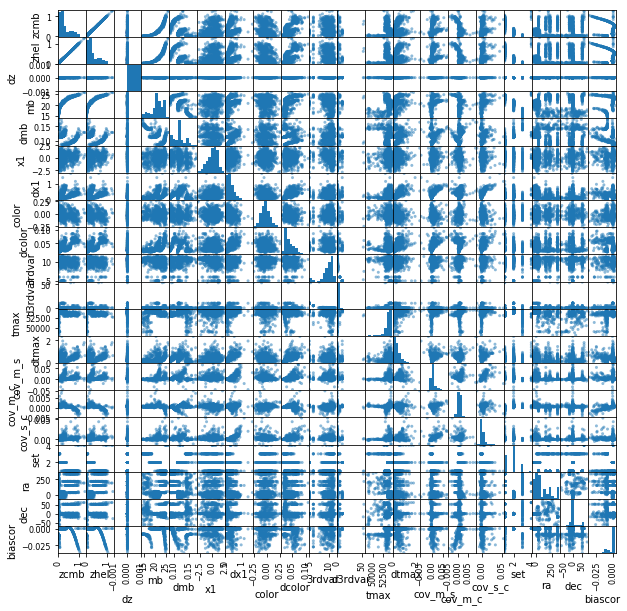

In [75]:
pd.plotting.scatter_matrix(jla, figsize=(10, 10));

The target variables for our analysis are redshift and brightness: "zcmb" and "mb". This an exercise about fitting lines to data. Why does it lot look like there is a line relationship between them? How can does the relationship look? Plot the "zcmb" vs "mb". Include the y uncertainty which is reported in "dmb". Plot each data point with a different color based on the survey it comes from. The survey data is indicated by the variable "set". To do it you can use the dataframe plotting methods (```df.plot.scatter()```),  or pylab:  ```pylab.scatter()```, or ```pylab.plot()``` --asking to plot the data as point ('.')-- but for each the way you relate the color to a column value is a bit different. Stackoverflow is your friend here!

In [0]:
import matplotlib
import matplotlib.cm as cm

In [0]:
zcmb = jla["zcmb"].copy()
mb = jla["mb"].copy()
uncertainty = jla["dmb"].copy()

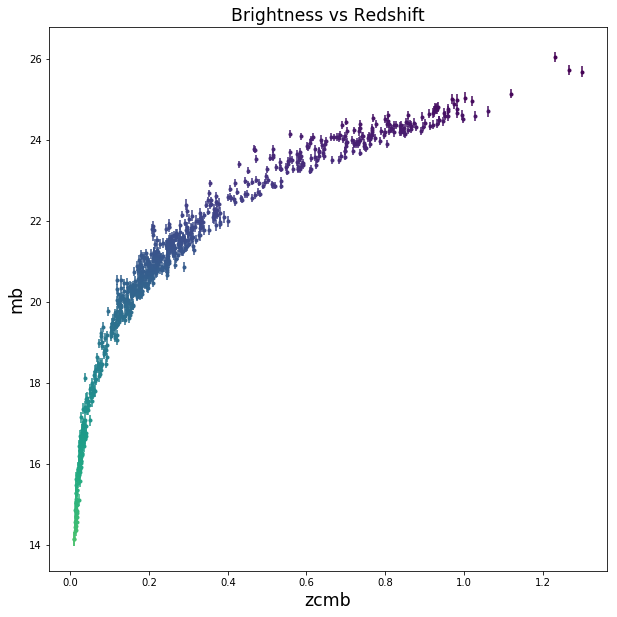

In [78]:
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(zcmb,mb, s = 0, c = zcmb);
norm = matplotlib.colors.Normalize(vmin=min(mb), vmax=max(mb), clip=True);
mapper = cm.ScalarMappable(norm=norm, cmap='viridis');
m = max(mb)
n = min(mb)
time_color = np.array([(mapper.to_rgba(m + n - 0.75*v - 7)) for v in mb]);

for x, y, e, color in zip(zcmb, mb, uncertainty, time_color):
  ax.plot(x, y, '.', color=color)
  ax.errorbar(x, y, e, color=color)
ax.set_title("Brightness vs Redshift", fontsize = "xx-large")
ax.set_xlabel("zcmb", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large");

__Description:__ This plot shows that the brightness increases as a function of the redshift, and follows a logarithmic trend

It is a **power law**, which means it will be linear in logarithmic space - specifically in log10(_x_) vs natural _y_ space.

Replot the data with natural y axis and logarithmic x axis, you can do that by taking the log of the data and then plotting it or by using plot functionalities (e.g. for ```df.plot.scatter()``` you can use ```logx=True```)

Note that when we talk about log we (generally) talk about log base 10! 


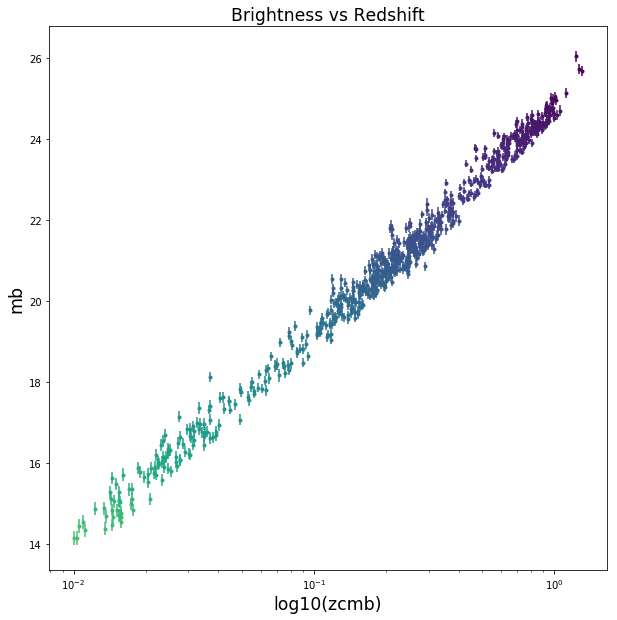

In [79]:
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')

for x, y, e, color in zip(zcmb, mb, uncertainty, time_color):
  ax.plot(x, y, '.', color=color)
  ax.errorbar(x, y, e, color=color)
ax.set_title("Brightness vs Redshift", fontsize = "xx-large")
ax.set_xlabel("log10(zcmb)", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large");

**Description:** This plot shows more clearly that the brightness increases as a function of the log10 of the redshift.

# Fit a line to the data with scipy

For each model you fit below you should make a plot of the data and the model. Consider your fit to the data with the uncertainties your "baseline fit"

Like we did in class: fit a line using ```scipy.optimize``` (lab 5). Do it without and with the uncertainties on your _y_ data (the ```curvefit``` argument to include uncertainties in the endogenous variable is ```sigma```). Report the variace and the covariance by printing your mode uncertainties explicitly as below:





In [0]:
from scipy import optimize
from scipy.optimize import curve_fit

def line(x, a, b):
  return a*x + b

**Fitting the data without the uncertainties in the y data...**

In [95]:
logZcmb = np.log10(zcmb)

params, cov = curve_fit(line, logZcmb, mb)
a1, b1 = params
da1, db1 = np.sqrt(cov[0][0]), np.sqrt(cov[1][1])

print("slope = %.1f \u00B1 %.3f" % (a1, da1))
print("intercept = %.1f \u00B1 %.3f" % (b1, db1))
print("parameters covariance = %.5f " % cov[0][1])

slope = 5.4 ± 0.022
intercept = 24.7 ± 0.019
parameters covariance = 0.00035 


**Fitting the data with the uncertainties in the y data...**

In [96]:
sig = np.zeros(len(mb)) + np.std(uncertainty)
params, cov = curve_fit(line, logZcmb, mb, sigma = uncertainty, absolute_sigma = True)
a2, b2 = params
da2, db2 = np.sqrt(cov[0][0]), np.sqrt(cov[1][1])

print("slope = %.1f \u00B1 %.3f" % (a2, da2))
print("intercept = %.1f \u00B1 %.3f" % (b2, db2))
print("parameters covariance = %.5f " % cov[0][1])

slope = 5.4 ± 0.009
intercept = 24.7 ± 0.007
parameters covariance = 0.00005 


hint: remember to sort the data!

plot the data like you did above and the model you just created including the uncertainty band (look at lab5: there is a mistake we made in class which I corrected in the version I uploaded)

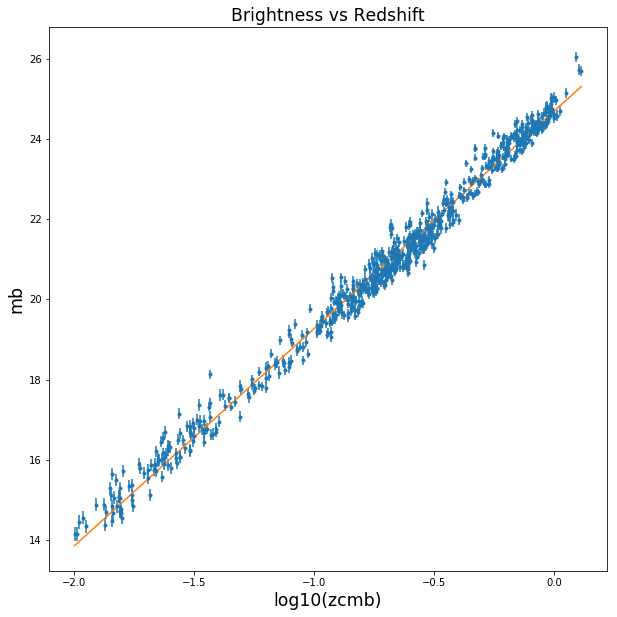

In [104]:
fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
ax.scatter(logZcmb, mb, s = 1)
ax.errorbar(logZcmb, mb, xerr=None, yerr=uncertainty, fmt='.')

modelMb = line(logZcmb, a2, b2)
maxMb = line(logZcmb, a2 + np.sqrt(cov[0][0]), b2 + np.sqrt(cov[1][1]))
minMb = line(logZcmb, a2 - np.sqrt(cov[0][0]), b2 - np.sqrt(cov[1][1]))

ax.plot(logZcmb, modelMb)
ax.fill_between(logZcmb, maxMb, minMb, alpha = 0.5)

ax.set_title("Brightness vs Redshift", fontsize = "xx-large")
ax.set_xlabel("log10(zcmb)", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large");

**Description:** The above figure contains a couple of things. The first is the same scatter plot as before, plotting the brightness vs the log10 of the redshift (including errorbars). The orange line is the linear fit to this model. The green shaded region is the uncertainty region of the model. It is not visibile because the uncertainty in the parameters is very small. This model was created by taking the uncertainty in the data into consideration.

Compare the *model* values and uncertainty you obtained by fitting the model with and without including the uncertainties on the y values.  Comment on your findings.

**Answer:** The models were very similar. The parameters obtained for the y values with and without uncertainties were the same. The only difference was that the uncertainty in the parameters was smaller when the errorbars were considered.

Now fit the data using only 1 every 20 points - use this: https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array

Plot the new model and its uncertainty band and comment on the model: how do the three models compare?

slope = 5.4 ± 0.110
intercept = 24.6 ± 0.097
parameters covariance = 0.00868 


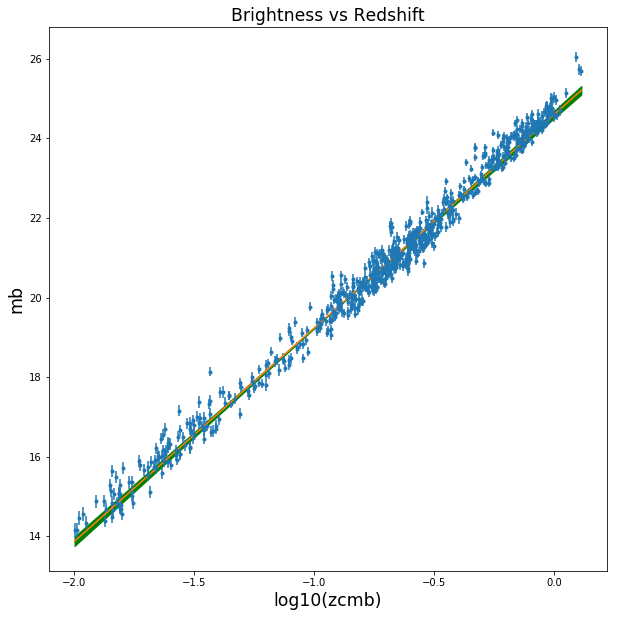

In [105]:
logZcmb = np.log10(zcmb)
params, cov = curve_fit(line, logZcmb[1::20], mb[1::20])
a3, b3 = params
da3, db3 = np.sqrt(cov[0][0]), np.sqrt(cov[1][1])

print("slope = %.1f \u00B1 %.3f" % (a3, da3))
print("intercept = %.1f \u00B1 %.3f" % (b3, db3))
print("parameters covariance = %.5f " % cov[0][1])

fig = plt.figure(figsize = (10, 10));
ax = fig.add_subplot(1, 1, 1)
ax.scatter(logZcmb, mb, s = 1)
ax.errorbar(logZcmb, mb, xerr=None, yerr=uncertainty, fmt='.')

modelMb = line(logZcmb, a3, b3)
maxMb = line(logZcmb, a3 + da3, b3 + db3)
minMb = line(logZcmb, a3 - da3, b3 - db3)

ax.plot(logZcmb, modelMb)
ax.fill_between(logZcmb, maxMb, minMb, color = 'green', alpha = 1)

ax.set_title("Brightness vs Redshift", fontsize = "xx-large")
ax.set_xlabel("log10(zcmb)", fontsize = "xx-large")
ax.set_ylabel("mb", fontsize = "xx-large");

**Description:** The above figure contains a couple of things. The first is the same scatter plot as before, plotting the brightness vs the log10 of the redshift (including errorbars). The orange line is the linear fit to this model. The green shaded region is the uncertainty region of the model. The green region is noticably larger than the model created using every point (as opposed to every 20th value). This model was created by taking the uncertainty in the data into consideration, and by using only every 20th value.

# Fit a quadratic equation

Use the same function ```curve_fit()``` to fit a quadratic equation to the data. 
The equation is below

Plot your data, your original model which included uncertainties, and the current quadratic model


In [0]:
def quad(x, a, b, c):
    '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
    '''
    return a * x**2 + b * x + c


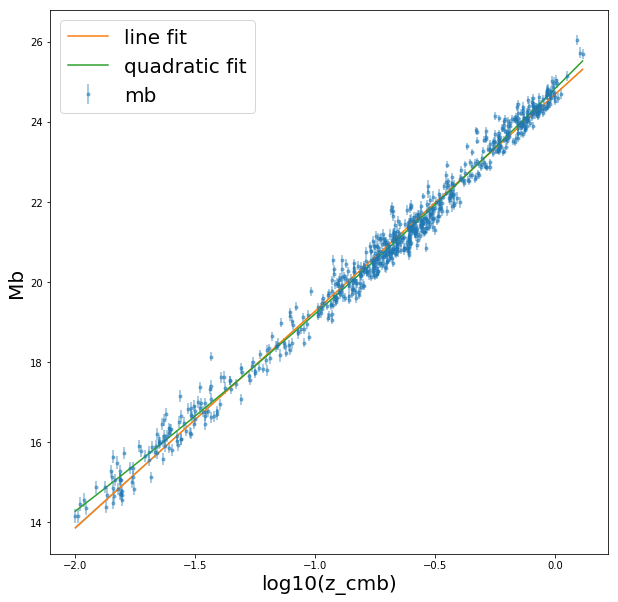

# Now fit the data with sklearn 
like we did in class (lab 5): create a regressor linear model and fit the data to it. Predict the y values based on the input data. Make the usual plot of data and model including your baseline model with scipy

# Cross valudation: Split your data into a training and test set
this is the "signature" of the machine learning approach. While this can be done using simply a random number generator
(see example)

do it using the sklear capabilities: ```skl.model_selection.train_test_split```. Read abnout the ```stratify``` funcionality of this method: it allows you to create unbiased train-test samples. In this case it is not necessary but it may be useful in your future!


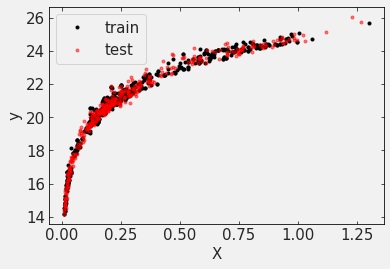

In [0]:
# handmade train-test split
Nall = len(jla)
Ntrain = int(Nall * 0.75)
train = numpy.random.randint(0, high=Nall, size=Ntrain)
test = np.setdiff1d(np.arange(Nall), train)
X_train, y_train = jla.zcmb[train], jla.mb[train]
X_test, y_test = jla.zcmb[test], jla.mb[test]
pl.plot(X_train, y_train, 'k.', label="train")
pl.plot(X_test, y_test, 'r.', alpha=0.5, label="test")
pl.xlabel("X")
pl.ylabel("y")
pl.legend()

In [0]:
#instead use sklern to split
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(...)

Plot the data, the baseline mode, and the new model, but colorcode the data based on the training or test set (instead othe survey it comes from like you had done before)

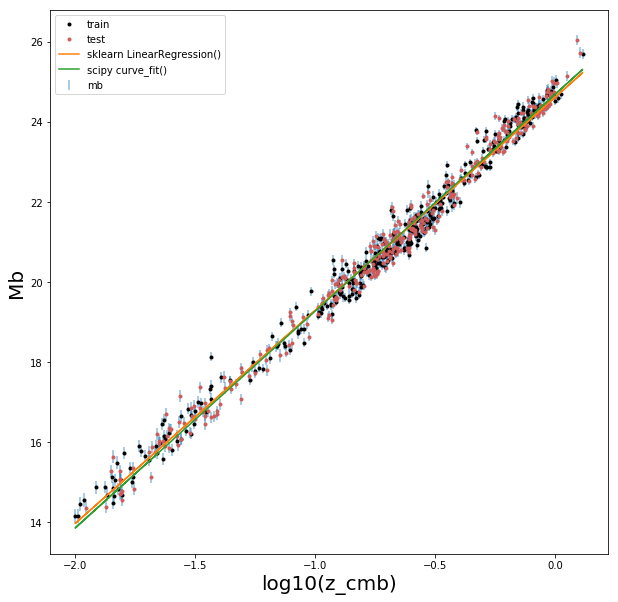

Calculate the scores of the train and test set. Make considerations about the quality of the model including how robust it is (is it overfitting?)